# Get The DATA

In [ ]:
!wget https://github.com/Lionheart-il/methods/raw/master/handle_sparse_data/train.csv.zip

In [4]:
#extract the data from the zip file
import zipfile
with zipfile.ZipFile('/content/train.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [5]:
#import the csv file
import pandas as pd
import numpy as np
dataset = pd.read_csv('/content/train.csv',index_col='id')

In [6]:
dataset.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,...,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,...,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


# Create Dummies

In [7]:
#cat_cols = dataset.select_dtypes(include=[object]).columns
dataset = pd.get_dummies(dataset,drop_first=True)

In [8]:
dataset.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss,cat1_B,cat2_B,cat3_B,cat4_B,cat5_B,cat6_B,cat7_B,cat8_B,cat9_B,cat10_B,cat11_B,cat12_B,cat13_B,cat14_B,cat15_B,cat16_B,cat17_B,cat18_B,cat19_B,cat20_B,cat21_B,cat22_B,cat23_B,cat24_B,cat25_B,...,cat116_LU,cat116_LV,cat116_LW,cat116_LX,cat116_LY,cat116_M,cat116_MA,cat116_MB,cat116_MC,cat116_MD,cat116_ME,cat116_MF,cat116_MG,cat116_MH,cat116_MI,cat116_MJ,cat116_MK,cat116_ML,cat116_MM,cat116_MN,cat116_MO,cat116_MP,cat116_MQ,cat116_MR,cat116_MS,cat116_MT,cat116_MU,cat116_MV,cat116_MW,cat116_O,cat116_P,cat116_Q,cat116_R,cat116_S,cat116_T,cat116_U,cat116_V,cat116_W,cat116_X,cat116_Y
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09,0,1,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Split The Data

In [9]:
y = dataset['loss']
X = dataset.drop('loss',axis = 1)

In [10]:
X.shape

(188318, 1037)

## Checking Sparsity of Matrix

In [11]:
! pip install scipy

In [12]:
from numpy import count_nonzero

print('Sparsity of matrix = ', 1 - count_nonzero(X) / X.size)

Sparsity of matrix =  0.9514283596071206


# Transform the matrix to CSR

In [13]:
from numpy import array
from scipy.sparse import csr_matrix, isspmatrix

# convert to CSR matrix
X = csr_matrix(X)

In [14]:
print(X)

  (0, 0)	0.7263
  (0, 1)	0.245921
  (0, 2)	0.187583
  (0, 3)	0.789639
  (0, 4)	0.31006100000000003
  (0, 5)	0.718367
  (0, 6)	0.33505999999999997
  (0, 7)	0.3026
  (0, 8)	0.67135
  (0, 9)	0.8351
  (0, 10)	0.569745
  (0, 11)	0.594646
  (0, 12)	0.822493
  (0, 13)	0.714843
  (0, 15)	1.0
  (0, 17)	1.0
  (0, 22)	1.0
  (0, 24)	1.0
  (0, 36)	1.0
  (0, 90)	1.0
  (0, 96)	1.0
  (0, 97)	1.0
  (0, 100)	1.0
  (0, 105)	1.0
  (0, 108)	1.0
  :	:
  (188317, 116)	1.0
  (188317, 118)	1.0
  (188317, 123)	1.0
  (188317, 124)	1.0
  (188317, 146)	1.0
  (188317, 150)	1.0
  (188317, 158)	1.0
  (188317, 162)	1.0
  (188317, 167)	1.0
  (188317, 173)	1.0
  (188317, 184)	1.0
  (188317, 201)	1.0
  (188317, 209)	1.0
  (188317, 264)	1.0
  (188317, 276)	1.0
  (188317, 293)	1.0
  (188317, 310)	1.0
  (188317, 329)	1.0
  (188317, 366)	1.0
  (188317, 522)	1.0
  (188317, 554)	1.0
  (188317, 580)	1.0
  (188317, 614)	1.0
  (188317, 703)	1.0
  (188317, 1012)	1.0


## Data Visualization

In [15]:
#import plotting libraries
import numpy
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


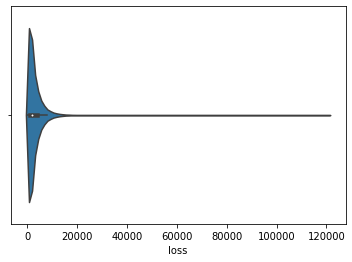

In [16]:
sns.violinplot(y)  
plt.show()

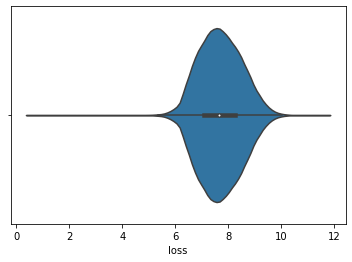

In [17]:
# now, let's apply log(1+x)
sns.violinplot(numpy.log1p(y))  
plt.show()

y = numpy.log1p(y)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1)
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [20]:
y_pred = model.predict(X_test)

In [21]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4409873948521156
Mean Squared Error: 0.31765895645534953
Root Mean Squared Error: 0.5636124168747079


## Ridge

In [22]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [23]:
y_pred = model.predict(X_test)

In [24]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.44065541234765015
Mean Squared Error: 0.3169693961811572
Root Mean Squared Error: 0.5630003518481647


## XGBoost

In [29]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators = 200,max_depth=300)

In [30]:
model.fit(X_train,y_train)

[08:38:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=300, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [31]:
y_pred = model.predict(X_test)

In [32]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4439444072637813
Mean Squared Error: 0.3255859229046985
Root Mean Squared Error: 0.5706013695257824


## KNN

In [37]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=1,n_jobs=-1)


In [38]:
model.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                    weights='uniform')

In [39]:
y_pred = model.predict(X_test)

In [40]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.6785275960698446
Mean Squared Error: 0.7622510845905905
Root Mean Squared Error: 0.8730699196459528
